In [3]:
import pandas as pd

In [4]:
cereals=pd.read_csv('Cereals.csv')
cereals.head()

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [5]:
cereals.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [6]:
def data_inspect(data):
    return pd.DataFrame({'Data type': data.dtypes, 'Levels': data.apply(lambda x: x.unique().shape[0], axis=0), 'Labels': data.apply(lambda x: str(x.unique()), axis=0)})
data_inspect(cereals)

,Data type,Levels,Labels
name,object,77,['100%_Bran' '100%_Natural_Bran' 'All-Bran' 'A...
calories,int64,11,[70 120 50 110 130 90 100 140 150 160 80]
protein,int64,6,[4 3 2 1 6 5]
fat,int64,5,[1 5 0 2 3]
sodium,int64,27,[130 15 260 140 200 180 125 210 220 290 280 90...
fiber,float64,13,[10.0 2.0 9.0 14.0 1.0 1.5 4.0 5.0 0.0 3.0 6.0...
carbo,float64,22,[5.0 8.0 7.0 14.0 10.5 11.0 18.0 15.0 13.0 12....
sugars,float64,17,[6.0 8.0 5.0 0.0 10.0 14.0 12.0 1.0 9.0 7.0 13...
potass,float64,36,[280.0 135.0 320.0 330.0 nan 70.0 30.0 100.0 1...
vitamins,int64,3,[25 0 100]


In [7]:
cereals.shape

(77, 14)

In [8]:
labels=cereals['name']
cereals.drop(['name','shelf','weight','cups','rating'], axis=1, inplace=True)

In [9]:
cereals.isnull().sum(axis=0)

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer
median_imputer=SimpleImputer(strategy='median')
median_imputer.fit(cereals)
imputed_cereals=pd.DataFrame( median_imputer.transform(cereals), columns=cereals.columns)

In [11]:
imputed_cereals.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0
1,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0
2,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0
3,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0
4,110.0,2.0,2.0,200.0,1.0,14.0,8.0,90.0,25.0


In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(imputed_cereals)
std_cereals=pd.DataFrame(scaler.transform(imputed_cereals), columns=imputed_cereals.columns)

In [13]:
std_cereals.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
count,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01
mean,-1.258012e-16,5.767392e-17,1.013349e-16,-5.190653e-17,1.463476e-16,-2.076261e-16,-6.524363e-17,4.325544e-18,5.190653e-17
std,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00
min,-2.938605e+00,-1.420902e+00,-1.013072e+00,-1.917189e+00,-9.088244e-01,-2.540894e+00,-1.625849e+00,-1.208612e+00,-1.272550e+00
25%,-3.555846e-01,-5.014948e-01,-1.013072e+00,-3.563056e-01,-4.864980e-01,-7.257291e-01,-9.316327e-01,-7.740763e-01,-1.462701e-01
50%,1.610194e-01,4.179123e-01,-1.298811e-02,2.440343e-01,-6.417167e-02,-7.745601e-02,-6.010534e-03,-1.222721e-01,-1.462701e-01
75%,1.610194e-01,4.179123e-01,9.870962e-01,6.042382e-01,3.581547e-01,5.708171e-01,9.196117e-01,3.122641e-01,-1.462701e-01
max,2.744040e+00,3.176134e+00,3.987349e+00,1.924986e+00,5.003745e+00,2.126673e+00,1.845234e+00,3.354017e+00,3.232570e+00


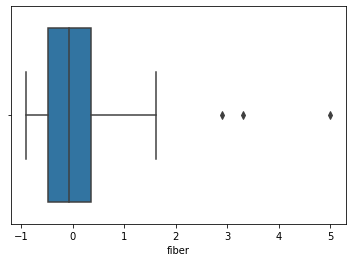

In [14]:
import seaborn as sns
%matplotlib inline
sns.boxplot(std_cereals['fiber'])

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


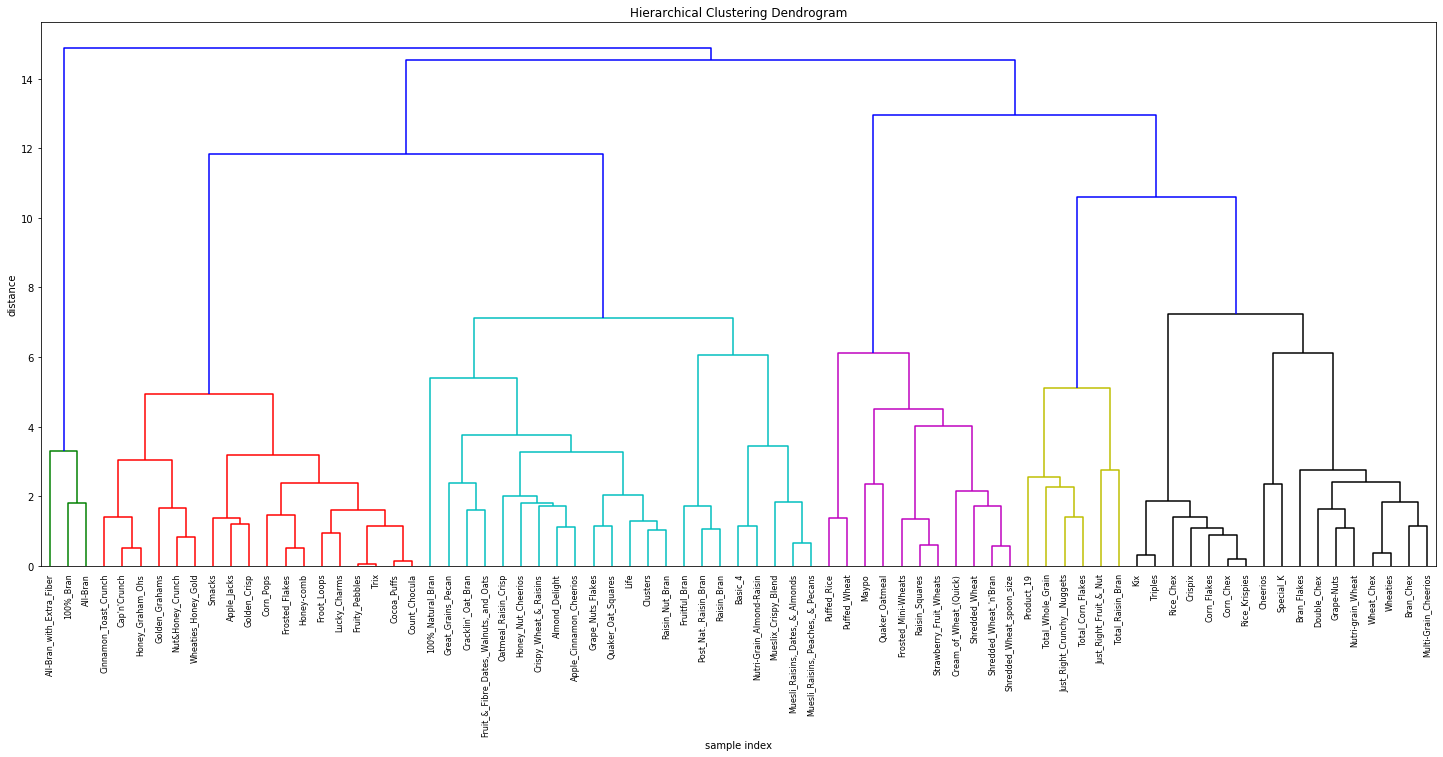

In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_matrix=linkage(std_cereals, method='ward', metric='euclidean')
import matplotlib.pyplot as plt
%matplotlib inline
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    linkage_matrix,
    labels=labels.as_matrix(),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [16]:
#agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
agg_cluster=AgglomerativeClustering(affinity='euclidean',linkage='ward', n_clusters=8 )

cluster_result=agg_cluster.fit_predict(std_cereals)
agg_result=pd.DataFrame({'Label': labels, 'Agg_Cluster': cluster_result})
agg_result.head()

,Label,Agg_Cluster
0,100%_Bran,7
1,100%_Natural_Bran,3
2,All-Bran,7
3,All-Bran_with_Extra_Fiber,7
4,Almond_Delight,3


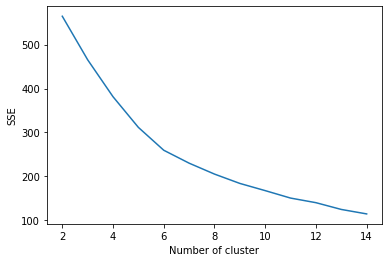

In [17]:
#wss plot
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wss={}
for k in range(2,15):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(std_cereals)
    wss[k]=kmeans.inertia_
    plt.figure()
%matplotlib inline
plt.plot(list(wss.keys()), list(wss.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()
    

In [18]:
from sklearn.cluster import KMeans
kmeans_obj=KMeans(n_clusters=6)
kmean_cluster=kmeans_obj.fit_predict(std_cereals)
kmeans_result=pd.DataFrame({'Labels': labels, 'Cluster': kmean_cluster})
kmeans_result.head()

,Labels,Cluster
0,100%_Bran,5
1,100%_Natural_Bran,3
2,All-Bran,5
3,All-Bran_with_Extra_Fiber,5
4,Almond_Delight,1
